<a href="https://colab.research.google.com/github/Alan-B525/BHBv2/blob/main/RNN_TP_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales Recurrentes

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocesado de datos

In [117]:

dataset = pd.read_csv('/content/NASDAQ_train.csv')

#remove colmn 'Adj Close'
dataset = dataset.drop(['Date','Adj Close'], axis=1)

#round all the values to 2 decimal places
dataset = dataset.round(2)
dataset.head()


,Open,High,Low,Close,Volume
0,1578.87,1636.03,1571.98,1632.21,1438410000
1,1621.48,1640.46,1604.63,1628.03,1816580000
2,1642.37,1665.63,1636.25,1652.38,2137640000
3,1621.63,1625.37,1588.20,1599.06,2020170000
4,1590.25,1617.01,1584.28,1617.01,1968160000


In [118]:
training_set_open = dataset.loc[:,['Open']].values
training_set_high = dataset.loc[:,['High']].values
training_set_low = dataset.loc[:,['Low']].values
training_set_close = dataset.loc[:,['Close']].values
training_set_volume = dataset.loc[:,['Volume']].values

## Escalar los datos: Normalization

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
#normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_open_scaled = scaler.fit_transform(training_set_open)
training_set_high_scaled = scaler.fit_transform(training_set_high)
training_set_low_scaled = scaler.fit_transform(training_set_low)
training_set_close_scaled = scaler.fit_transform(training_set_close)
training_set_volume_scaled = scaler.fit_transform(training_set_volume)

## Crear una estructura de datos con 60 timesteps y 1 salida
- En cada momento del tiempo la red neuronal podrá mirar 60 pasos atrás en términos de memoria, en función de esos 60 días atrás queremos predecir cuál será el siguiente valor, a partir de los t-60 predecir el t+1
- Para este caso utilizamos un trimestres, tres meses de cotización para predecir el siguiente valor.


In [121]:
X_train = []
y_train = []

for i in range(60, training_set_open_scaled.size):
    X_train.append(training_set_open_scaled[i-60:i, 0])
    y_train.append(training_set_open_scaled[i, 0])

for i in range(60, training_set_high_scaled.size):
    X_train.append(training_set_high_scaled[i-60:i, 0])

for i in range(60, training_set_low_scaled.size):
    X_train.append(training_set_low_scaled[i-60:i, 0])

for i in range(60, training_set_close_scaled.size):
    X_train.append(training_set_close_scaled[i-60:i, 0])

for i in range(60, training_set_volume_scaled.size):
    X_train.append(training_set_volume_scaled[i-60:i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [122]:
X_train.shape

(16065, 60)

In [123]:
y_train.shape

(3213,)

## Añadimos otra dimensión en los datos de entrenamiento, variables predictoras.
- Hasta ahora solo hemos utilizado el valor de apertura de la acción. Pero se podrían utilizar más variables, como por ejemplo el precio de cierre
- Este cambio de dimensión lo realizaremos con ``np.reshape()``

In [124]:
X_train = np.reshape(X_train, (3213, 60, 5))
X_train.shape

(3213, 60, 5)

# Construcción de la RNN

In [125]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

### Inicialización del la red

In [126]:
regressor = Sequential()

### Añadir las capas  LSTM y  regularización por Dropout

In [127]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(rate=0.2))

### Añadir la capa de salida

In [128]:
regressor.add(Dense(units=1))

### Compilar la RNN 

In [129]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Entrenamiento de la Red Neuronal Recurrente

In [130]:
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
101/101 [==============================] - 10s 21ms/step - loss: 0.0587
Epoch 2/50
101/101 [==============================] - 2s 20ms/step - loss: 0.0544
Epoch 3/50
101/101 [==============================] - 2s 19ms/step - loss: 0.0452
Epoch 4/50
101/101 [==============================] - 2s 19ms/step - loss: 0.0429
Epoch 5/50
101/101 [==============================] - 2s 19ms/step - loss: 0.0411
Epoch 6/50
101/101 [==============================] - 3s 28ms/step - loss: 0.0414
Epoch 7/50
101/101 [==============================] - 2s 23ms/step - loss: 0.0414
Epoch 8/50
101/101 [==============================] - 2s 19ms/step - loss: 0.0405
Epoch 9/50
101/101 [==============================] - 2s 20ms/step - loss: 0.0412
Epoch 10/50
101/101 [==============================] - 2s 20ms/step - loss: 0.0421
Epoch 11/50
101/101 [==============================] - 2s 20ms/step - loss: 0.0405
Epoch 12/50
101/101 [==============================] - 2s 20ms/step - loss: 0.0401
Epoch 13/50


In [131]:
regressor.output_shape

(None, 1)

## Obtener el valor real de las acciones de enero de 2017 

In [132]:

data_test = pd.read_csv('/content/NASDAQ_test.csv')

#remove colmn 'Adj Close'
data_test = data_test.drop(['Date','Adj Close'], axis=1)

#round all the values to 2 decimal places
data_test = data_test.round(2)
data_test.head()

real_stock_price = data_test.loc[:, ['Open']].values

In [133]:
test_set_open = data_test.loc[:,['Open']].values
test_set_high = data_test.loc[:,['High']].values
test_set_low = data_test.loc[:,['Low']].values
test_set_close = data_test.loc[:,['Close']].values
test_set_volume = data_test.loc[:,['Volume']].values

In [134]:
#normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
test_set_open_scaled = scaler.fit_transform(test_set_open)

scaler_features = MinMaxScaler(feature_range=(0, 1))
test_set_high_scaled = scaler_features.fit_transform(test_set_high)
test_set_low_scaled = scaler_features.fit_transform(test_set_low)
test_set_close_scaled = scaler_features.fit_transform(test_set_close)
test_set_volume_scaled = scaler_features.fit_transform(test_set_volume)

In [135]:
X_test = []
y_test = []

for i in range(60, test_set_open_scaled.size):
    X_test.append(test_set_open_scaled[i-60:i, 0])
    y_test.append(test_set_open_scaled[i, 0])

for i in range(60, test_set_high_scaled.size):
    X_test.append(test_set_high_scaled[i-60:i, 0])

for i in range(60, test_set_low_scaled.size):
    X_test.append(test_set_low_scaled[i-60:i, 0])

for i in range(60, test_set_close_scaled.size):
    X_test.append(test_set_close_scaled[i-60:i, 0])

for i in range(60, test_set_volume_scaled.size):
    X_test.append(test_set_volume_scaled[i-60:i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

y_test.shape


(104,)

In [136]:
X_test = np.reshape(X_test, (104, 60, 5))
X_test.shape

(104, 60, 5)

# Predecir el valor de las acciones

Creamos la estructura de datos como lo hicimos con los de entrenamiento, para los valores de testing.

Realizamos la predicción.

In [144]:
# Prediccion de los valores del mes de enero 
predicted_stock_price = regressor.predict(X_test)


In [138]:

# revertimos la normalizacion para ver el 
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

predicted_stock_price

array([[12412.825 ],
       [12414.566 ],
       [12416.034 ],
       [12417.141 ],
       [12417.796 ],
       [12417.705 ],
       [12417.37  ],
       [12416.45  ],
       [12415.998 ],
       [12416.001 ],
       [12416.252 ],
       [12415.894 ],
       [12413.219 ],
       [12409.963 ],
       [12409.743 ],
       [12413.05  ],
       [12413.624 ],
       [12419.166 ],
       [12428.2705],
       [12427.636 ],
       [12421.732 ],
       [12413.181 ],
       [12414.873 ],
       [12416.2   ],
       [12417.239 ],
       [12417.715 ],
       [12417.533 ],
       [12417.103 ],
       [12416.479 ],
       [12416.305 ],
       [12416.235 ],
       [12416.2   ],
       [12415.526 ],
       [12412.391 ],
       [12409.538 ],
       [12409.68  ],
       [12411.567 ],
       [12413.179 ],
       [12419.991 ],
       [12425.69  ],
       [12423.253 ],
       [12418.318 ],
       [12413.981 ],
       [12415.467 ],
       [12416.595 ],
       [12417.532 ],
       [12417.732 ],
       [12417

# Visualizar los resultados

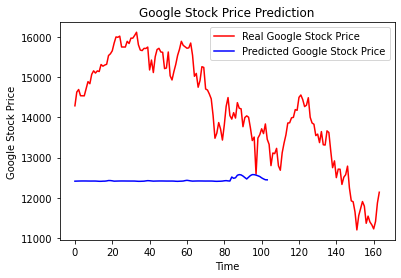

In [139]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Error absoluto medio de la predicción.

In [141]:
mean_absolute_error(predicted_stock_price, real_stock_price)

ValueError: ignored

Valos promedio de las acciones el mes de Enero.

In [ ]:
np.mean(real_stock_price)

El porcentaje de error sobre el valor de las acciones.

In [ ]:
mean_absolute_error(predicted_stock_price, real_stock_price) / np.mean(real_stock_price)

Calcularmos el rrror de cada dia de enero y lo graficamos.

In [ ]:
error = predicted_stock_price - real_stock_price

In [ ]:
plt.plot(error)
plt.axhline(y=0, xmin=0, xmax=20, ls='--', color='k')
plt.title('Trading Sistem')
plt.xlabel('Time')
plt.ylabel('Prediction error')